<a href="https://colab.research.google.com/github/youyouAier/NLP-Final/blob/main/NLP_NETFLIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [353]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

import string
import re

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

from time import time

import warnings
warnings.filterwarnings("ignore")

# Analysis of Data

In [354]:
import pandas as pd

# Read the CSV file
data = pd.read_csv(r'/content/drive/MyDrive/DVProject/ProjectDataSet/netflix_movies (1).csv', encoding='ISO-8859-1')

# Display the shape of the DataFrame
print(data.shape)

(8807, 12)


In [355]:
#import pandas as pd


#data = pd.read_csv(r'/content/drive/MyDrive/DVProject/ProjectDataSet/netflix_movies (1).csv')


#if 'rating' in data.columns:
 #   labels = data['rating']
   # num_unique_labels = labels.nunique()
  #  unique_labels = labels.unique()
    #print(f"Number of unique labels: {num_unique_labels}")
    #print(f"Unique labels: {unique_labels}")
#else:
 #   print("No labels found in the dataset.")

In [356]:
data["type"].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [357]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [358]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [359]:
directors = data.groupby(['director', 'type'])['director'].value_counts().reset_index().head(15)
directors

,director,type,count
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
5,Aamir Bashir,Movie,1
6,Aamir Khan,Movie,1
7,Aanand Rai,Movie,1
8,Aaron Burns,Movie,1
9,"Aaron Hancox, Michael McNamara",Movie,1


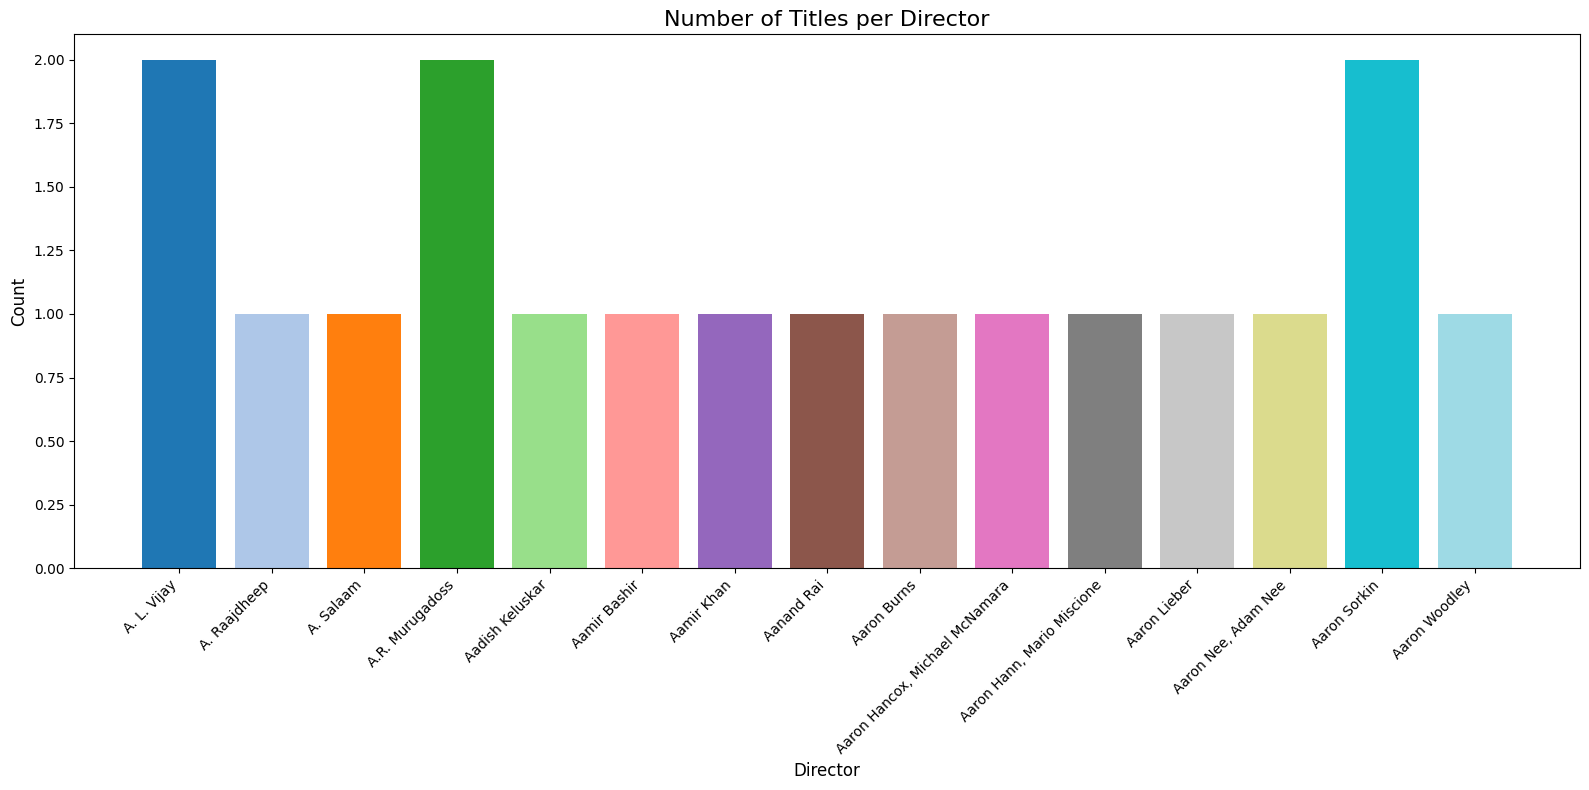

In [360]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16, 8))

# Number of unique directors for colormap
num_directors = len(directors)
colors = plt.cm.tab20(np.linspace(0, 1, num_directors))  # Choosing a colorful colormap

# Creating the bar plot with colorful bars
plt.bar(directors['director'], directors['count'], color=colors)

# Adding labels and title
plt.xlabel('Director', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Titles per Director', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating x-axis labels for better readability

# Displaying the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [361]:
#data = data[data.type != "Movie"]
#data.shape

In [362]:
data["type"].value_counts()/data.shape[0]

,count
type,
Movie,0.696151
TV Show,0.303849


In [363]:
fig = go.Figure([go.Bar(x=data['type'].value_counts().index, y=data['type'].value_counts().tolist())])
fig.update_layout(
title="Values in each Sentiment",
xaxis_title="Sentiment",
yaxis_title="Values")
fig.show()

# Text Preprocessing:

In [364]:
data['type'] = data.type.map({'Movie':1, 'TV Show':0}) # movie is 1, tvshow is 0
data = data[["description","type"]]
data = data[:1000]
data.shape

(1000, 2)

In [365]:
print(data['type'].unique())

[1 0]


In [366]:
data.head()

,description,type
0,"As her father nears the end of his life, filmm...",1
1,"After crossing paths at a party, a Cape Town t...",0
2,To protect his family from a powerful drug lor...,0
3,"Feuds, flirtations and toilet talk go down amo...",0
4,In a city of coaching centers known to train I...,0


In [367]:
import plotly.express as px

fig = px.pie(data, names='type', title='Distribution of Movie and TV Show Types')
fig.show()

In [368]:
data['description'][0]

'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'

# Text Cleaning:

In [369]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [370]:
import nltk
# download the stopwords corpus
nltk.download('stopwords')
# import stopwords
from nltk.corpus import stopwords
# print the english stopwords
english_stopwords = set(stopwords.words('english'))
print(english_stopwords)
from nltk.corpus import stopwords

{'of', 'will', 'this', "shouldn't", "you're", 'has', 'won', 'all', 'them', 'aren', "wasn't", 'she', 'a', 'same', 'ma', 'with', 'shan', 'him', 'under', 'through', 'yourself', 'm', 'mightn', "isn't", 'my', 'then', 'once', 'too', 'you', 'after', 'between', 'where', 'than', 'ourselves', 'does', "hadn't", 'itself', 'other', 'down', 'these', 'have', 'which', 'are', 'own', 'themselves', 'doesn', 'any', 'each', 'i', 'only', 'were', 'before', 'haven', 'mustn', "it's", 'until', 'wouldn', 'be', 'do', 'as', 'was', 't', 'above', 'they', 'it', "mustn't", "you'll", 'himself', 'y', 'out', 'in', 'again', 'hasn', 'been', "should've", 'nor', "she's", 'there', 'into', 'to', "haven't", 'while', 'couldn', 'myself', 'herself', 'up', 'being', 'few', 'd', 'why', 'just', "needn't", "shan't", 'both', 'we', 'more', 'what', 'no', 'theirs', 'is', 'off', "doesn't", 'further', 'hers', 'its', 'by', 'such', 'having', "won't", "hasn't", 'from', 'below', 've', "aren't", 'wasn', "you'd", 'so', "weren't", 'or', 'o', 'isn',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [371]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [372]:
#import spacy
#nlp = spacy.load('en_core_web_sm')
#stopwords = stop_words.ENGLISH_STOP_WORDS

import spacy
nlp = spacy.load('en_core_web_sm')

# Create a set of stop words
stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [373]:
# Initialize the WordNetLemmatizer for lemmatization
lemmatizer = WordNetLemmatizer()

# Function to clean the text data
def clean(doc):
    text_no_namedentities = []  # List to store text without named entities
    document = nlp(doc)  # Process the document using the spaCy NLP pipeline
    ents = [e.text for e in document.ents] #Extract named entities from the document
    for item in document: # Iterate through each token in the document
        if item.text in ents: # Check if the token is a named entity, if yes, skip
            pass
        else:
    # Append non-named entity tokens to the list
            text_no_namedentities.append(item.text)
    # Join the non-named entity tokens back into a string
    doc = (" ".join(text_no_namedentities))
    # Convert the text to lowercase and remove leading/trailing whitespaces
    doc = doc.lower().strip()
    # Replace specific substrings
    doc = doc.replace("</br>", " ")
    doc = doc.replace("-", " ")
    # Remove punctuation and digits
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    # Remove stopwords
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    # Lemmatize the words using WordNet Lemmatizer
    doc = "".join([lemmatizer.lemmatize(word) for word in doc])
    return doc

In [374]:
clean(data['description'][0])

'father nears end life filmmaker kirsten johnson stages death inventive comical ways help face inevitable'

In [375]:
data['description'] = data['description'].apply(clean)
data.head()

,description,type
0,father nears end life filmmaker kirsten johnso...,1
1,crossing paths party cape town teen sets prove...,0
2,protect family powerful drug lord skilled thie...,0
3,feuds flirtations toilet talk incarcerated wom...,0
4,city coaching centers known train finest colle...,0


In [376]:

# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'description' column to calculate TF-IDF values
tfidf_matrix = tfidf_vectorizer.fit_transform(data['description'])

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Print or use the tfidf_df and tfidf_matrix
print(tfidf_df.head())
tfidf_matrix

   abagnale  abandoned  abandons  abbey  abducted  abiding  abilities  \
0       0.0        0.0       0.0    0.0  0.000000      0.0        0.0   
1       0.0        0.0       0.0    0.0  0.273321      0.0        0.0   
2       0.0        0.0       0.0    0.0  0.000000      0.0        0.0   
3       0.0        0.0       0.0    0.0  0.000000      0.0        0.0   
4       0.0        0.0       0.0    0.0  0.000000      0.0        0.0   

   ability  able  aboard  ...  zack  zant  zany  zealand  zeon  zero  zombie  \
0      0.0   0.0     0.0  ...   0.0   0.0   0.0      0.0   0.0   0.0     0.0   
1      0.0   0.0     0.0  ...   0.0   0.0   0.0      0.0   0.0   0.0     0.0   
2      0.0   0.0     0.0  ...   0.0   0.0   0.0      0.0   0.0   0.0     0.0   
3      0.0   0.0     0.0  ...   0.0   0.0   0.0      0.0   0.0   0.0     0.0   
4      0.0   0.0     0.0  ...   0.0   0.0   0.0      0.0   0.0   0.0     0.0   

   zone  zoo  zquez  
0   0.0  0.0    0.0  
1   0.0  0.0    0.0  
2   0.0  0.0  

<1000x5120 sparse matrix of type '<class 'numpy.float64'>'
	with 12999 stored elements in Compressed Sparse Row format>

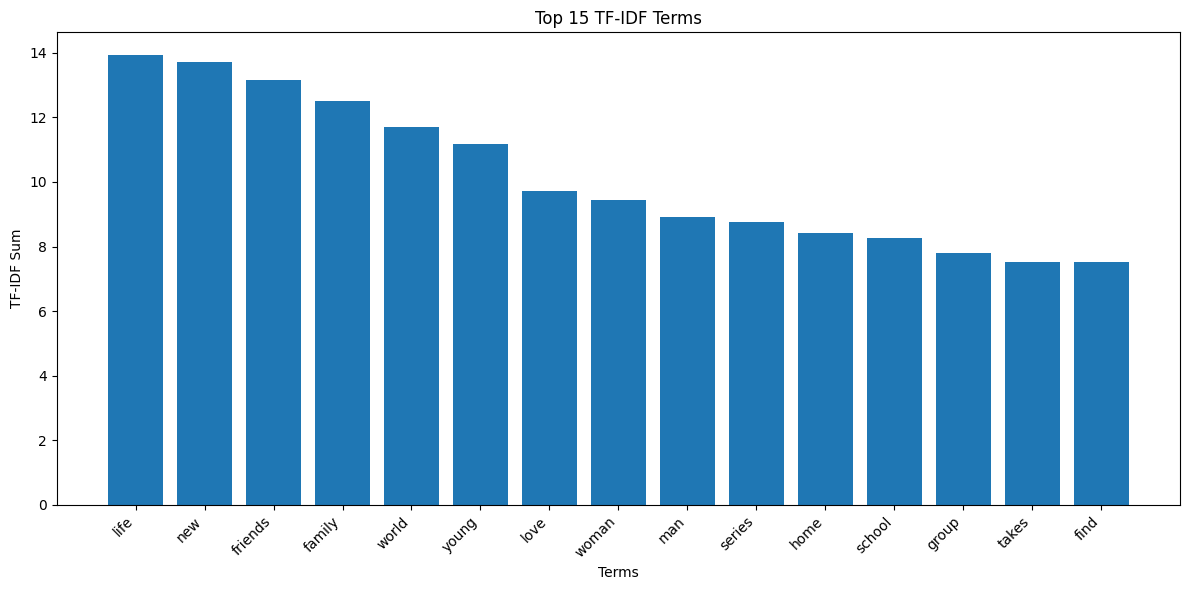

In [377]:
# Calculate the sum of TF-IDF values for each term
tfidf_sum = tfidf_df.sum(axis=0)

# Sort the terms by their TF-IDF sum in descending order
top_tfidf_terms = tfidf_sum.sort_values(ascending=False)

# Select the top N terms, for example, the top 15 terms
top_n = 15
top_terms = top_tfidf_terms.head(top_n)

# Create a bar plot to visualize the top TF-IDF terms
plt.figure(figsize=(12, 6))
plt.bar(top_terms.index, top_terms.values)
plt.xlabel("Terms")
plt.ylabel("TF-IDF Sum")
plt.title(f"Top {top_n} TF-IDF Terms")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [378]:
import pandas as pd
import nltk

# Download the required NLTK resource for English POS tagging
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng') # Download the English tagger
nltk.download('punkt_tab')

# Iterate over the first 5 description columns
for i in range(5):
    # Sample text (you can replace this with data['description'][i])
    text = data['description'][i]

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Perform POS tagging
    pos_tags = nltk.pos_tag(tokens)

    # Display the tokens and their POS tags
    print(f"Tokens and POS Tags for Description {i + 1}:")
    for token, tag in pos_tags:
        print(f"{token}: {tag}")

    print()

Tokens and POS Tags for Description 1:
father: NN
nears: NNS
end: VBP
life: NN
filmmaker: NN
kirsten: NNP
johnson: NN
stages: NNS
death: NN
inventive: JJ
comical: JJ
ways: NNS
help: VBP
face: NN
inevitable: JJ

Tokens and POS Tags for Description 2:
crossing: VBG
paths: NNS
party: NN
cape: NN
town: NN
teen: JJ
sets: NNS
prove: VBP
private: JJ
school: NN
swimming: VBG
star: NN
sister: NN
abducted: VBD
birth: NN

Tokens and POS Tags for Description 3:
protect: JJ
family: NN
powerful: JJ
drug: NN
lord: NN
skilled: VBD
thief: NN
expert: NN
team: NN
robbers: NNS
pulled: VBD
violent: JJ
deadly: RB
turf: JJ
war: NN

Tokens and POS Tags for Description 4:
feuds: JJ
flirtations: NNS
toilet: VBP
talk: NN
incarcerated: VBN
women: NNS
orleans: IN
justice: NN
center: NN
new: JJ
orleans: NNS
gritty: JJ
reality: NN
series: NN

Tokens and POS Tags for Description 5:
city: NN
coaching: NN
centers: NNS
known: VBN
train: VBP
finest: JJS
collegiate: NN
minds: NNS
earnest: VBP
unexceptional: JJ
student: NN

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


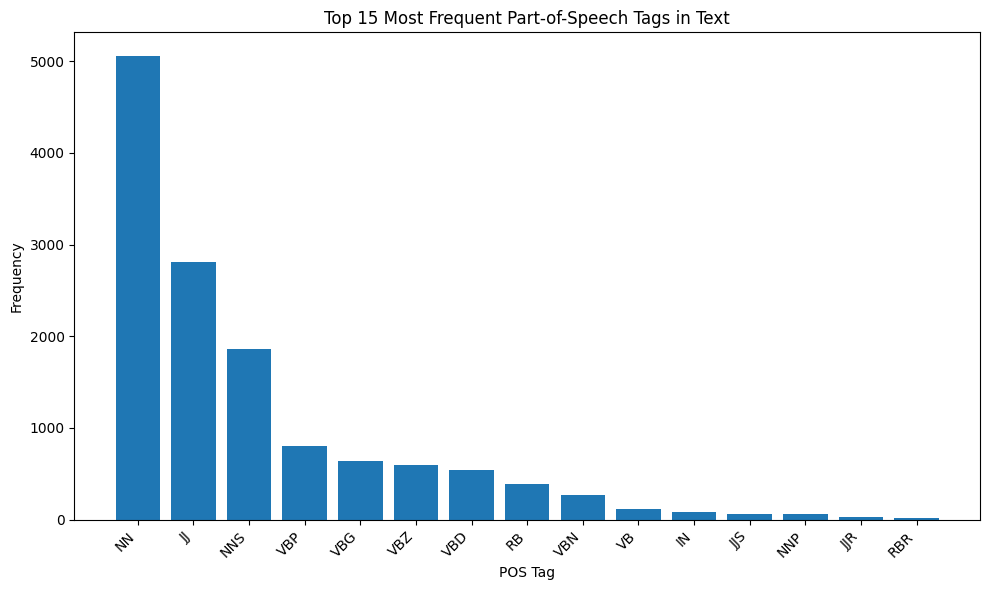

In [379]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from collections import Counter

# Download the required resources for POS tagging
nltk.download('averaged_perceptron_tagger')  # Download the tagger resource
nltk.download('punkt')  # Download the Punkt tokenizer resource

# Concatenate all descriptions into a single text
text = data['description'].str.cat(sep=' ')

# Tokenize the text into individual words
tokens = word_tokenize(text)

# Perform Part-of-Speech (POS) tagging on the tokens
tagged_tokens = pos_tag(tokens)

# Count the frequency of each POS tag
pos_counts = Counter(tag for word, tag in tagged_tokens)

# Get the top 15 most frequent POS tags
top_n = 15
top_pos_tags = dict(pos_counts.most_common(top_n))

# Create a DataFrame for better visualization
pos_df = pd.DataFrame(list(top_pos_tags.items()), columns=['POS Tag', 'Frequency'])

# Visualization of the top 15 most frequent POS tags
plt.figure(figsize=(10, 6))
plt.bar(pos_df['POS Tag'], pos_df['Frequency'])
plt.xlabel('POS Tag')
plt.ylabel('Frequency')
plt.title('Top 15 Most Frequent Part-of-Speech Tags in Text')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [380]:
import spacy
from spacy import displacy

# Load a spaCy model
nlp = spacy.load("en_core_web_sm")

# Assuming 'data' is your DataFrame and 'description' contains your text
for i in range(2):  # Process the first 3 descriptions
    text = data['description'][i]
    doc = nlp(text)
    displacy.render(doc, style="ent", jupyter=True)

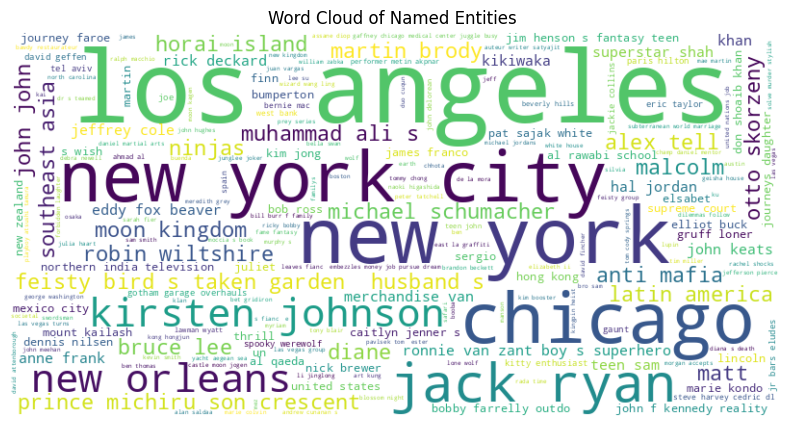

In [381]:
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")


data['cleaned_description'] = data['description'].str.replace('[^a-zA-Z ]', '', regex=True).str.lower()


text = data['cleaned_description'].str.cat(sep=' ')

# Process the text with spaCy
doc = nlp(text)

# Extract named entities and their labels
named_entities = [(ent.text, ent.label_) for ent in doc.ents]

# Create a dictionary of named entities and their frequencies
entity_frequencies = {}
for entity, label in named_entities:
    if label in ["PERSON", "ORG", "GPE", "LOC"]:
        entity_frequencies[entity] = entity_frequencies.get(entity, 0) + 1

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(entity_frequencies)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Named Entities ")
plt.show()

Top 15 words and their frequencies: [('s', 251), ('life', 89), ('new', 87), ('friends', 77), ('family', 75), ('world', 71), ('young', 65), ('love', 53), ('woman', 52), ('man', 48), ('series', 47), ('home', 45), ('school', 44), ('group', 42), ('teen', 39)]


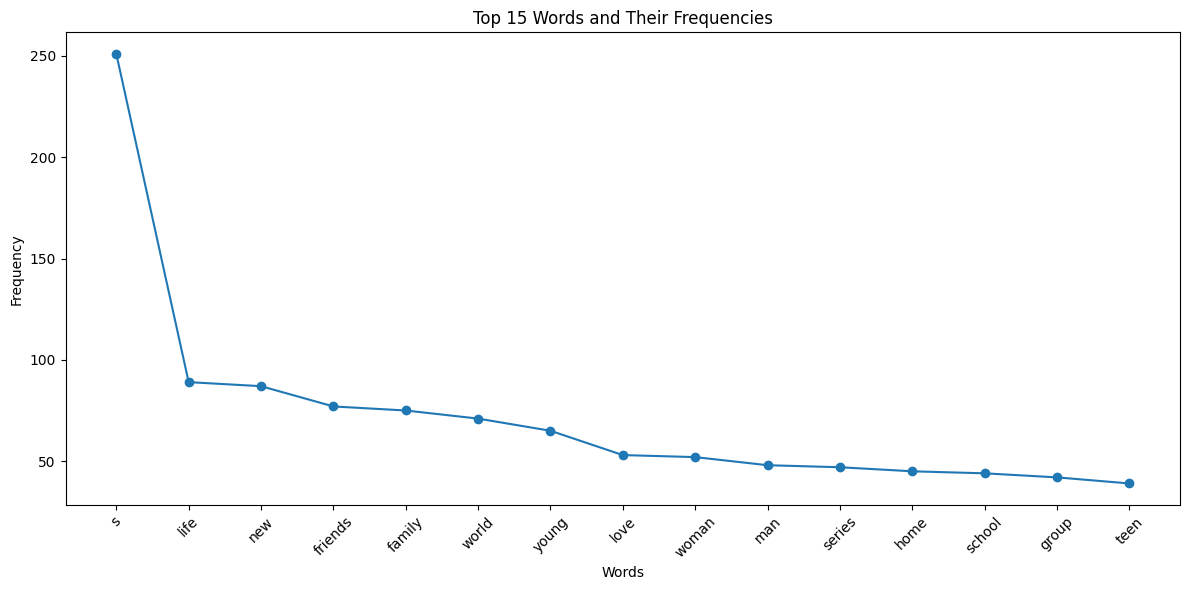

In [382]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import re
import matplotlib.pyplot as plt


# Bag-of-Words Implementation
all_descriptions = ' '.join(data['cleaned_description'])
tokens = word_tokenize(all_descriptions)
word_counts = Counter(tokens)

# Get the top 15 most common words and sort them by frequency
top_words = dict(word_counts.most_common(15))

# Sort the top words by frequency in descending order
sorted_top_words = dict(sorted(top_words.items(), key=lambda item: item[1], reverse=True))

# Print or process the top word counts as needed
print("Top 15 words and their frequencies:", list(sorted_top_words.items()))

# Create a line plot of the top 15 words and their frequencies
plt.figure(figsize=(12, 6))
plt.plot(sorted_top_words.keys(), sorted_top_words.values(), marker='o', linestyle='-')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Words and Their Frequencies')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

# Steps in Modelling process using sklearn package:

In [383]:
docs = list(data['description'])
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 20000)
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
docs = tfidf_vectorizer_vectors.toarray()

In [384]:
X = docs
y = data['type']
print(X.shape, y.shape)

(1000, 5120) (1000,)


In [385]:
fig = go.Figure([go.Bar(x=y.value_counts().index, y=y.value_counts().tolist())])
fig.update_layout(
    title="Values in each Sentiment",
    xaxis_title="Sentiment",
    yaxis_title="Values")
fig.show()

In [386]:
#Train-Test Split
SEED=123
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 5120) (800,)
(200, 5120) (200,)


# Naive Bayes Classifier:

Gaussian Naive Bayes

In [387]:
gnb = GaussianNB()
%time gnb.fit(X_train, y_train)

y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 64 ms, sys: 867 µs, total: 64.9 ms
Wall time: 65.5 ms

Training Accuracy score: 0.99875
Testing Accuracy score: 0.695


In [388]:
print(classification_report(y_test, y_pred_test, target_names=['TV Show', 'movie']))

              precision    recall  f1-score   support

     TV Show       0.58      0.43      0.50        69
       movie       0.74      0.83      0.78       131

    accuracy                           0.69       200
   macro avg       0.66      0.63      0.64       200
weighted avg       0.68      0.69      0.68       200



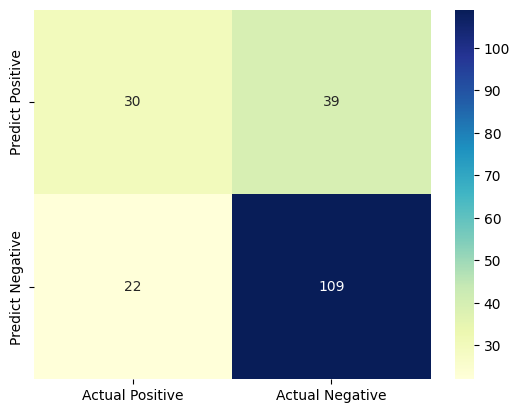

In [389]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

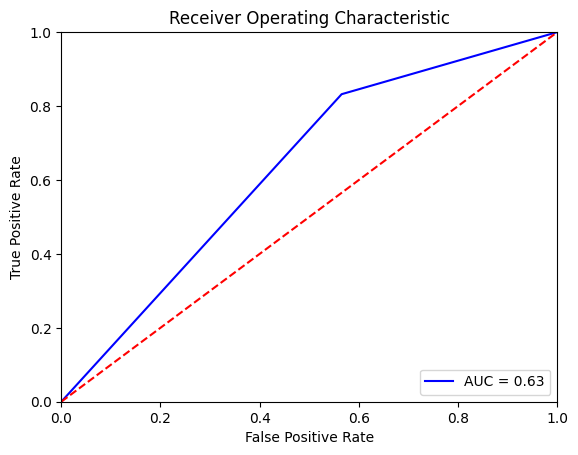

In [390]:
probs = gnb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Inference about Naive Bayes

fdgndfjdhyhfy



# Multinomial Naive Bayes:

In [391]:
mnb = MultinomialNB()
%time mnb.fit(X_train, y_train)

y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 30 ms, sys: 897 µs, total: 30.9 ms
Wall time: 23 ms

Training Accuracy score: 0.8725
Testing Accuracy score: 0.675


In [392]:
print(classification_report(y_test, y_pred_test, target_names=['TV Show', 'movie']))

              precision    recall  f1-score   support

     TV Show       1.00      0.06      0.11        69
       movie       0.67      1.00      0.80       131

    accuracy                           0.68       200
   macro avg       0.83      0.53      0.46       200
weighted avg       0.78      0.68      0.56       200



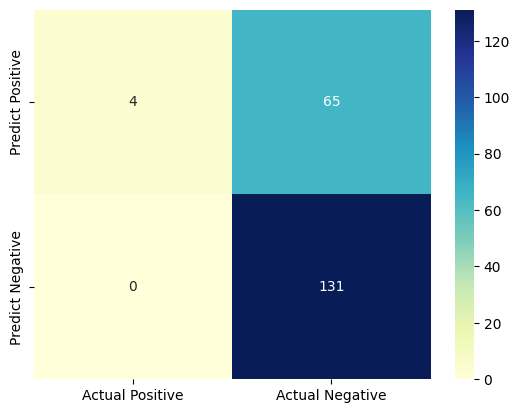

In [393]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

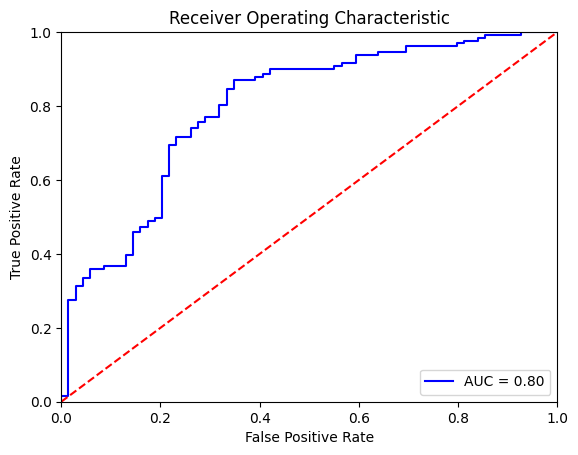

In [394]:
probs = mnb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Inference :

fgbdfjdsnnxdyjnxcdh

# Logistic Regression Classifier:

In [395]:
lr = LogisticRegression(random_state=SEED)
%time lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 184 ms, sys: 67.4 ms, total: 252 ms
Wall time: 210 ms

Training Accuracy score: 0.79125
Testing Accuracy score: 0.68


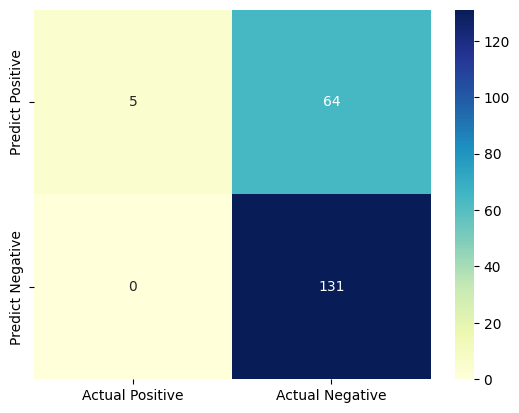

In [396]:
cm = confusion_matrix(y_test, y_pred_test)
#print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [397]:
print(classification_report(y_test, y_pred_test, target_names=['TV Show', 'movie']))

              precision    recall  f1-score   support

     TV Show       1.00      0.07      0.14        69
       movie       0.67      1.00      0.80       131

    accuracy                           0.68       200
   macro avg       0.84      0.54      0.47       200
weighted avg       0.79      0.68      0.57       200



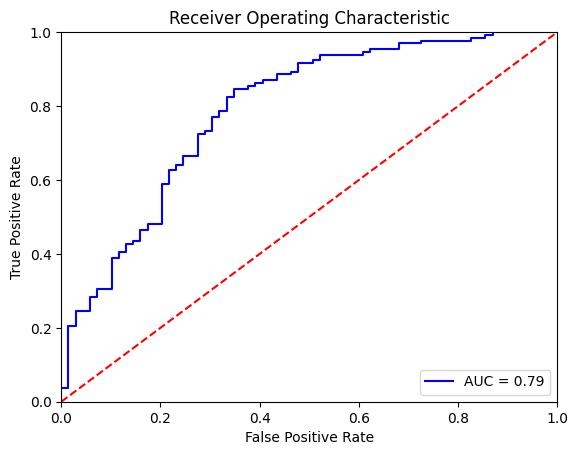

In [398]:
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

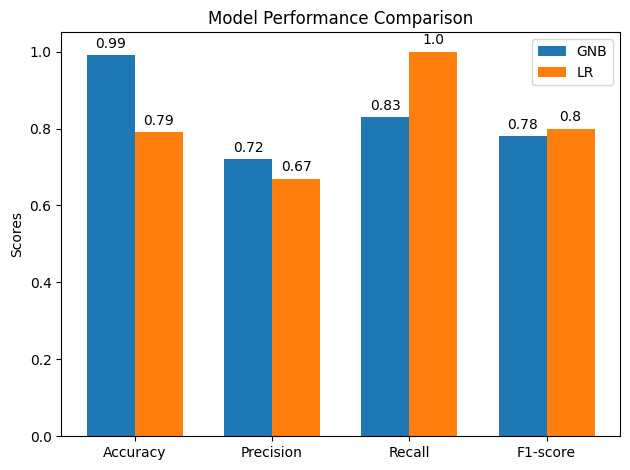

In [399]:
import matplotlib.pyplot as plt
import numpy as np

def plot_comparison(gnb_metrics, lr_metrics):



    metrics = list(gnb_metrics.keys())
    gnb_values = list(gnb_metrics.values())
    lr_values = list(lr_metrics.values())

    x = np.arange(len(metrics))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, gnb_values, width, label='GNB')
    rects2 = ax.bar(x + width/2, lr_values, width, label='LR')


    ax.set_ylabel('Scores')
    ax.set_title('Model Performance Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()


# For Movie:
gnb_metrics = {'Accuracy': 0.99, 'Precision': 0.72, 'Recall': 0.83, 'F1-score': 0.78}
lr_metrics = {'Accuracy': 0.79 ,'Precision': 0.67, 'Recall': 1, 'F1-score': 0.80}

plot_comparison(gnb_metrics, lr_metrics)

# Support Vector Machines:

In [400]:
svc =  LinearSVC(class_weight='balanced')
%time svc.fit(X_train, y_train)

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 37.2 ms, sys: 905 µs, total: 38.1 ms
Wall time: 61.6 ms

Training Accuracy score: 1.0
Testing Accuracy score: 0.75


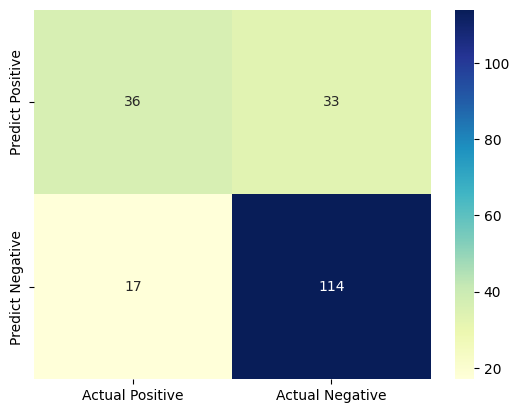

In [401]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [402]:
print(classification_report(y_test, y_pred_test, target_names=['TV Show', 'movie']))

              precision    recall  f1-score   support

     TV Show       0.68      0.52      0.59        69
       movie       0.78      0.87      0.82       131

    accuracy                           0.75       200
   macro avg       0.73      0.70      0.71       200
weighted avg       0.74      0.75      0.74       200



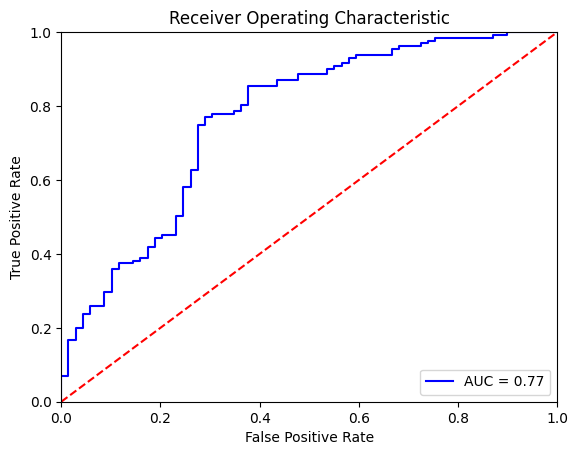

In [403]:
probs = svc._predict_proba_lr(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decision Tree Classifier:

In [404]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=SEED)
%time dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 2.41 s, sys: 809 µs, total: 2.41 s
Wall time: 2.53 s

Training Accuracy score: 1.0
Testing Accuracy score: 0.665


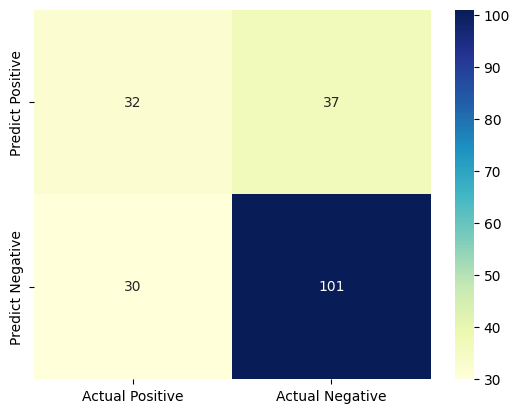

In [405]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [406]:
print(classification_report(y_test, y_pred_test, target_names=['TV Show', 'movie']))

              precision    recall  f1-score   support

     TV Show       0.52      0.46      0.49        69
       movie       0.73      0.77      0.75       131

    accuracy                           0.67       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.66      0.67      0.66       200



# Ensembling:

In [407]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Decision Tree', dt),
               ('Logistic Regression', lr),
                ('Naive Bayes', gnb)
              ]
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred_train=vc.predict(X_train)
y_pred_test = vc.predict(X_test)
print("Training Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

Training Accuracy score: 1.0
Testing Accuracy score: 0.7
